In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Flood_Health_Vulnerability.csv")
df.head()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,FloodHealthIndex_Quintiles
0,60759809001,0.072957,8.040000e-10,0.599175,0.356678,0.996080,0.150559,-6.00000,0.182261,0.035771,22.0584,36.5200,15.1339,0.133608,14.10930,17.5025,0.480591,84.8190,5
1,60750201001,0.079893,1.240000e-01,0.651000,0.509706,0.724000,0.232000,7.83292,0.000000,0.020516,16.0115,62.0535,10.5741,0.238000,10.24060,15.8921,0.522000,83.4860,5
2,60750117001,0.027149,1.030000e-01,0.697000,0.378595,0.862000,0.171000,-1.99906,0.106609,0.005321,1.4068,98.5924,0.8008,0.187000,39.56220,4.9374,0.635000,83.4791,5
3,60750178021,0.084215,8.800000e-02,0.584000,0.327362,0.843000,0.119000,-5.96629,0.064579,0.024166,14.9856,54.0699,9.5802,0.229000,7.04366,19.2683,0.427000,82.4925,5
4,60750125012,0.095332,2.219991e-01,0.726001,0.794750,0.694997,0.202999,7.13278,0.000000,0.004105,15.5000,63.7499,12.9672,0.424998,13.72550,14.6184,0.731997,81.8061,5


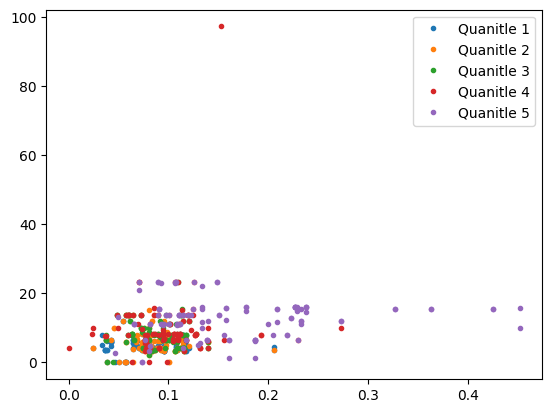

In [4]:
plt.figure()
for i in range(1,6):
    sub_df = df[df['FloodHealthIndex_Quintiles'] == i]
    plt.plot(sub_df['Disability'] , sub_df['Diabetes'], '.', label = 'Quanitle {}'.format(i))
plt.legend()
plt.show()

<AxesSubplot:xlabel='Homeless', ylabel='Asthma'>

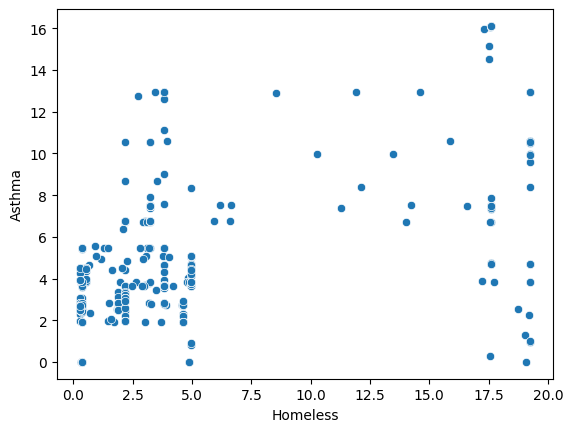

In [31]:
sns.scatterplot(data=df, x="Homeless", y="Asthma")
# sns.lineplot(data=df, x="Diabetes", y="FloodHealthIndex")

In [23]:
"""Types of Algorithms Used"""
grouper = KNeighborsClassifier()
print(type(grouper))
from sklearn.svm import SVC
tree_predictor = SVC()
print(type(tree_predictor))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
<class 'sklearn.svm._classes.SVC'>


In [7]:
X = df.iloc[:, 1:17]
Y = df.iloc[:, 18]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, train_size=.2, random_state=7)
attributes = X.columns
labels = [str(i) for i in Y.unique()]

In [8]:
grouper.fit(X,Y)
# how do I print the graph?
graph = grouper.kneighbors_graph(X)
type(graph)

scipy.sparse._csr.csr_matrix

In [24]:
# Fit and validation
tree_predictor.fit(x_train, y_train)

y_predict = tree_predictor.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_predict)

0.3952483801295896

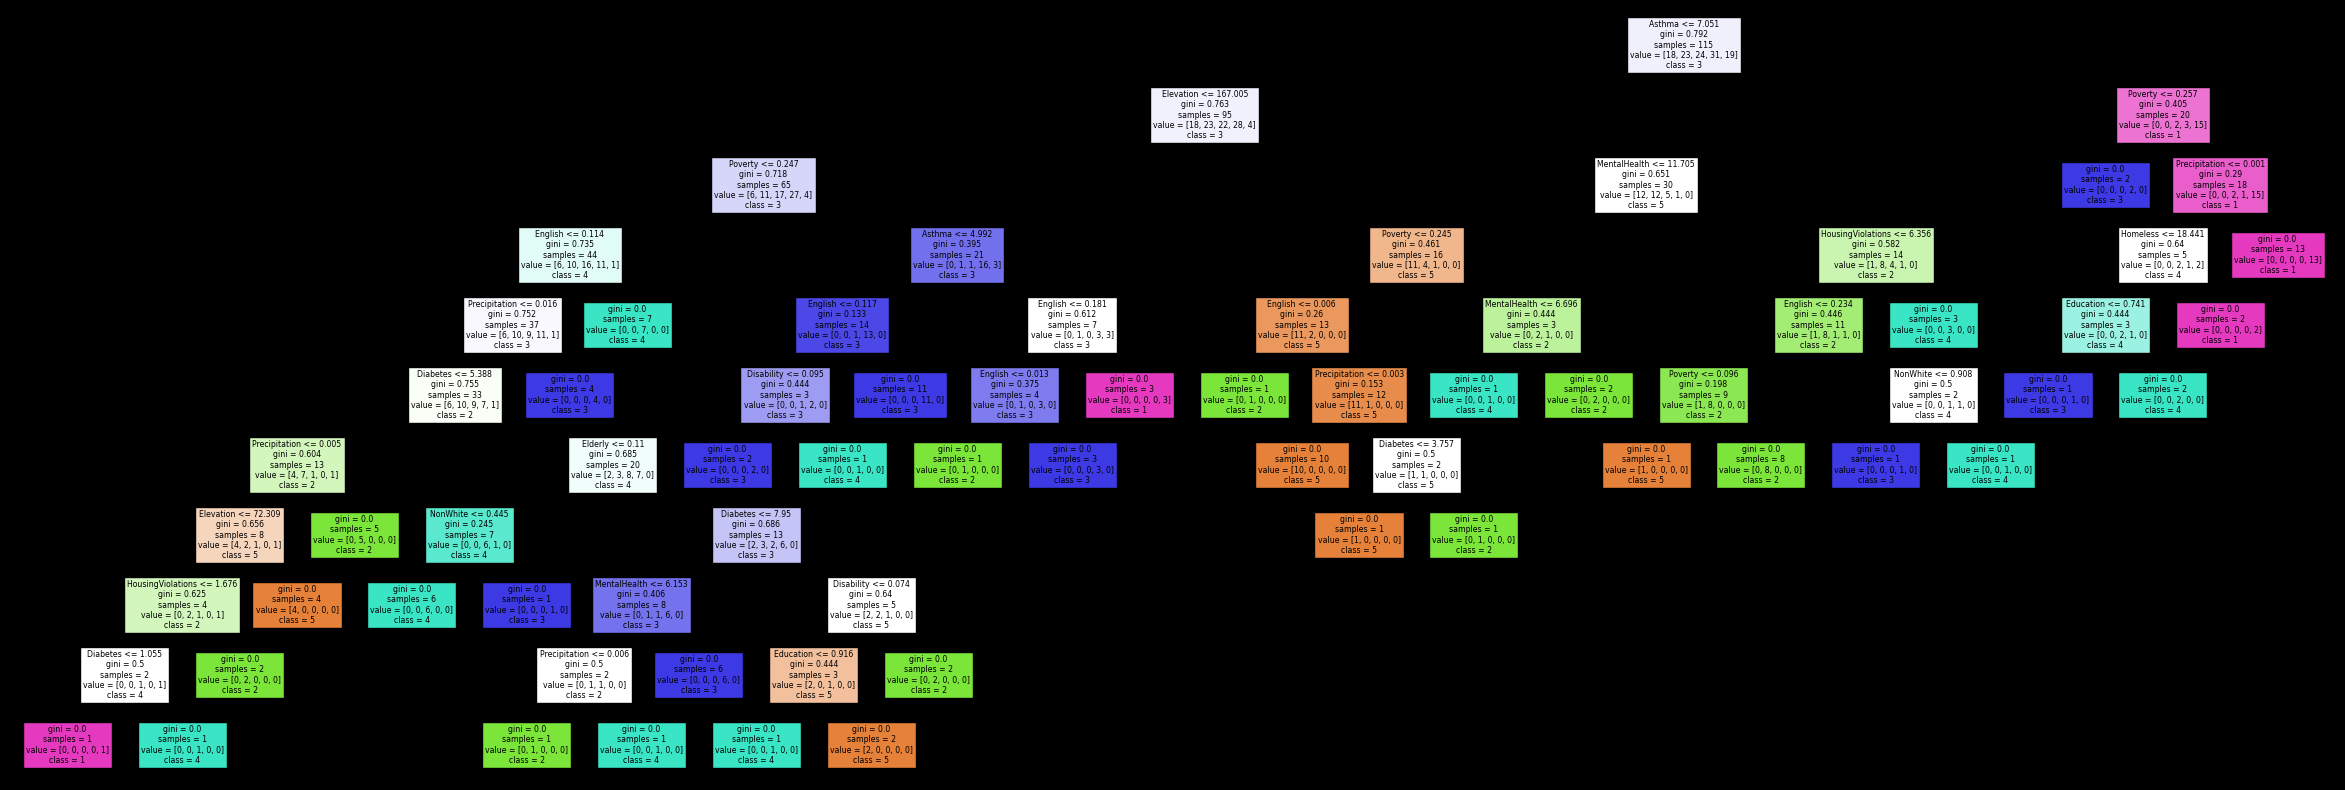

In [14]:
plt.figure(figsize=(30,10), facecolor="k")
a = tree.plot_tree(tree_predictor, feature_names = attributes, class_names = labels, filled = True)
plt.savefig("tree.png", dpi=1000)
plt.show()

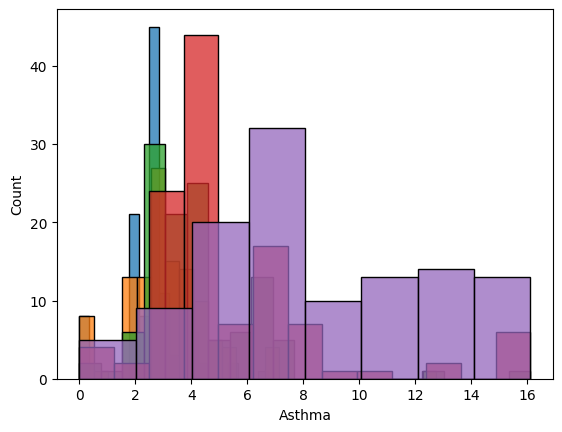

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,FloodHealthIndex_Quintiles
215,60750476004,0.157537,0.181,0.600000,0.193520,0.867000,0.153,180.206,0.0,0.000000,3.6936,9.3824,2.2769,0.087,3.67562,4.6154,0.254000,36.5665,1
463,60750301012,0.085448,0.088,0.384001,0.269931,0.968998,0.043,265.222,0.0,0.002336,4.2903,8.3133,2.7956,0.086,10.37510,3.7988,0.419999,37.8531,1
464,60750204012,0.062136,0.086,0.221000,0.088034,0.981000,0.021,363.203,0.0,0.008821,5.5252,6.1685,2.8918,0.080,19.02040,2.1589,0.450000,37.8530,1
465,60750313021,0.173333,0.134,0.870000,0.383138,0.799999,0.183,285.138,0.0,0.000000,8.0011,13.8127,3.9528,0.115,2.29885,0.5207,0.215000,37.6199,1
466,60750313012,0.174113,0.152,0.819000,0.267079,0.833000,0.133,210.088,0.0,0.000618,7.7683,13.4238,3.8621,0.115,3.17461,0.5141,0.208000,37.6198,1


In [26]:
# seperate dataset by quintiles and lok for corelations.
for i in range(1,6):
    exec(f"quintile_{i} = df[df['FloodHealthIndex_Quintiles'] == {i}]")  # seperates the dataset into 5 different datasets.

plt.figure()
df_list = []
for i in range(1,6):
    # exec(f"sns.scatterplot(data=quintile_{i}, x='Asthma', y='NonWhite', legend=True)")
    exec(f"sns.histplot(data=quintile_{i}, x='Asthma')")
    exec(f"df_list.append(quintile_{i})")
    # print(type(eval(f"quintile_{i}")))
plt.show()
df_list[0].head()

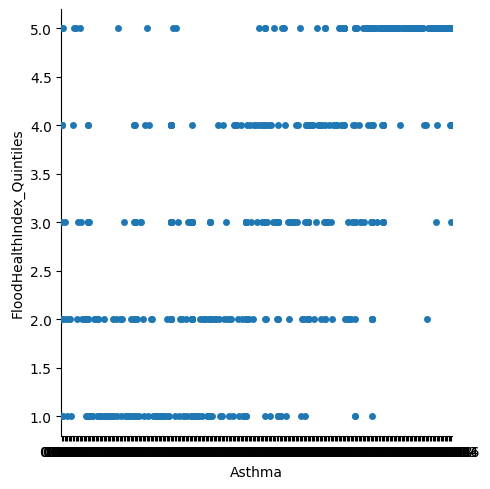

In [25]:
sns.catplot(data=df, x="Asthma", y="FloodHealthIndex_Quintiles")
plt.show()